<a href="https://colab.research.google.com/github/21pa1a6128/CodeAlpha_DataScience/blob/main/Task-3-line_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv('/content/drive/MyDrive/advertising (1).csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.shape

(200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isna().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

<Axes: ylabel='TV'>

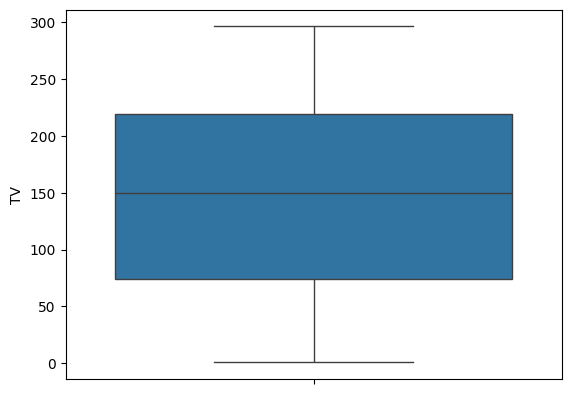

In [10]:
  sns.boxplot(df['TV'])

<Axes: ylabel='Newspaper'>

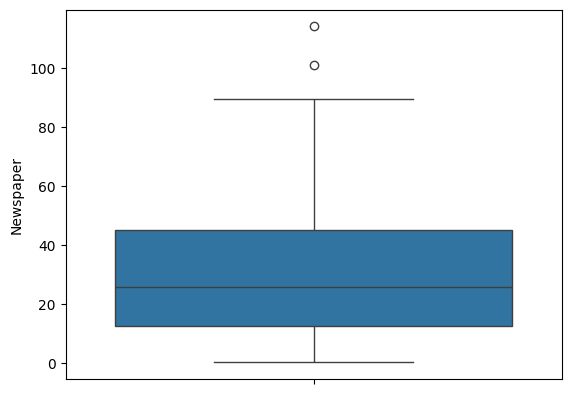

In [11]:
sns.boxplot(df['Newspaper'])

<Axes: ylabel='Radio'>

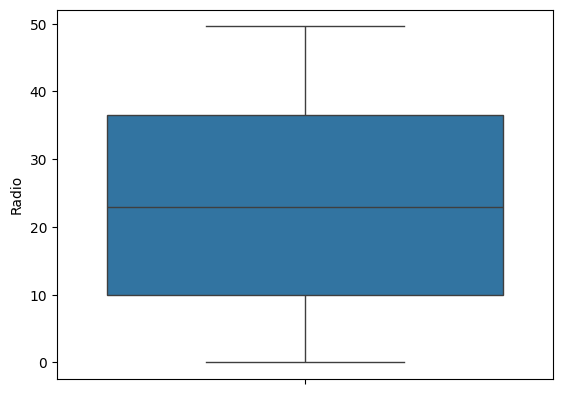

In [12]:
sns.boxplot(df['Radio'])

<Axes: ylabel='Sales'>

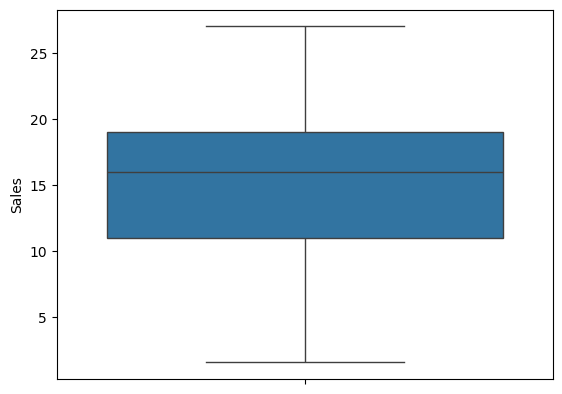

In [13]:
sns.boxplot(df['Sales'])

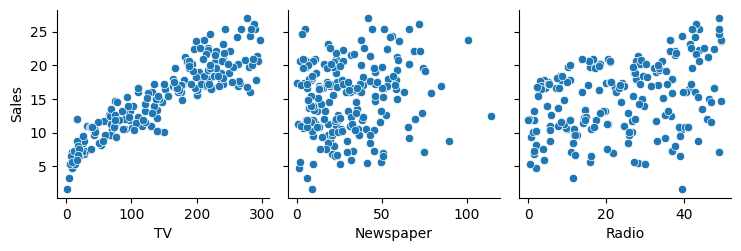

In [14]:
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales')

<Axes: >

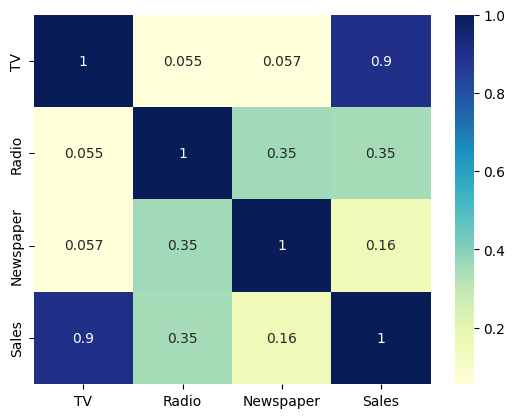

In [15]:
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

In [16]:
X = df[['TV']]
Y = df[['Sales']]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=10)

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

predition dataset

In [18]:
y_train_predict = reg.predict(x_train)

<ipython-input-19-dd7d8b4e240c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_train_predict,bins=15)


<Axes: ylabel='Density'>

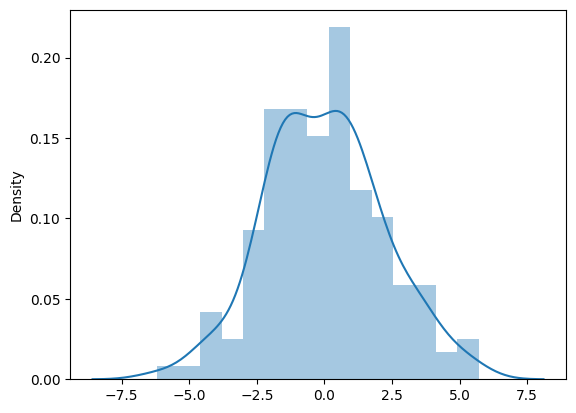

In [19]:
sns.distplot(y_train-y_train_predict,bins=15)

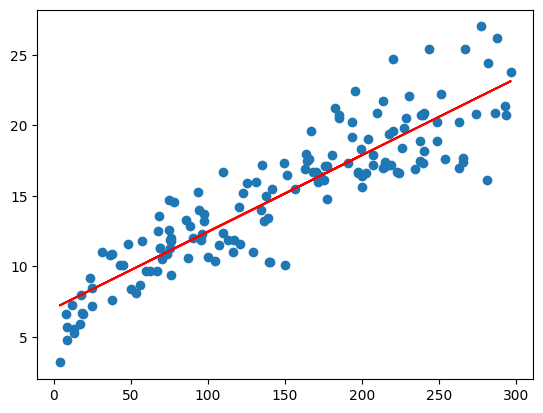

In [20]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_train_predict,color='r')
plt.show()

In [21]:
y_test_predict = reg.predict(x_test)

In [22]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_test_predict))

2.6142049523118978

In [23]:
from sklearn.metrics import r2_score
print("Accuracy =",r2_score(y_test,y_test_predict))

Accuracy = 0.8218506182225036


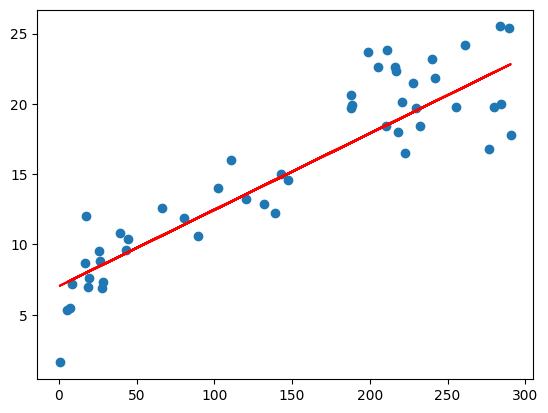

In [24]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_test_predict,color="r")
plt.show()